# Analysis - exp50

- Tune attempt 1 for AlphaZero. c and learning rate.

In [1]:
import os
import csv
import numpy as np
import torch as th

from glob import glob
from pprint import pprint

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

from notebook_helpers import load_params
from notebook_helpers import load_monitored
from notebook_helpers import join_monitored
from notebook_helpers import score_summary

def load_data(path, run_index=(0, 20)):
    runs = range(run_index[0], run_index[1]+1)
    exps = []
    for r in runs:
        file = os.path.join(path, "run_{}_monitor.csv".format(int(r)))
        try:
            mon = load_monitored(file)
        except FileNotFoundError:
            mon = None
        exps.append(mon)
    return exps

# Load data

In [6]:
path = "/Users/qualia/Code/azad/data/wythoff/exp50/"
exp_50 = load_data(path, run_index=(0, 399))
grid_50 = load_params(os.path.join(path, "grid.csv"))

In [7]:
print(grid_50.keys())

dict_keys(['row_code', 'device_code', 'c', 'learning_rate'])


In [8]:
print(len(grid_50['row_code']))
print(len(exp_50))

400
400


In [9]:
pprint(exp_50[0].keys())
pprint(len(exp_50[0]['loss']))
pprint(exp_50[0]['score'][:20])

dict_keys(['file', 'episode', 'loss', 'score'])
200
[0.25,
 0.4,
 0.4,
 0.4,
 0.30434782608695654,
 0.3076923076923077,
 0.3125,
 0.32432432432432434,
 0.30952380952380953,
 0.30612244897959184,
 0.3090909090909091,
 0.3157894736842105,
 0.31666666666666665,
 0.29411764705882354,
 0.3150684931506849,
 0.3291139240506329,
 0.3333333333333333,
 0.32967032967032966,
 0.3368421052631579,
 0.32323232323232326]


# Plots

## c, exploration constant

Curves for each c. We tabulate over all other metaparams.

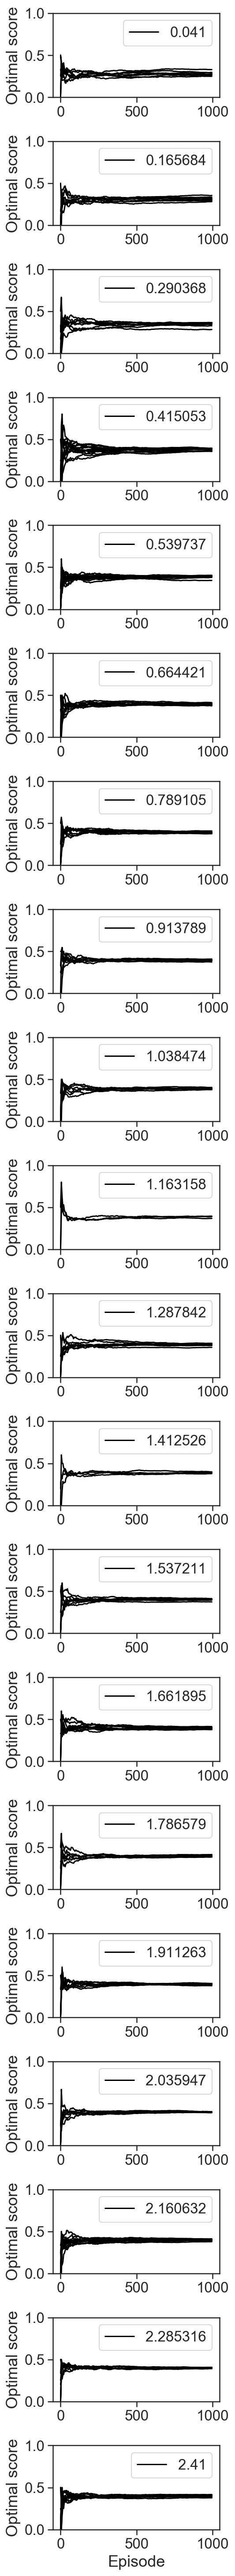

In [11]:
plt.figure(figsize=(4, 40.5))

cs = sorted(set(grid_50['c']))
for n, c in enumerate(cs):
    plt.subplot(len(cs), 1, n+1)
    index = c == np.asarray(grid_50['c'])
    index = np.arange(0,len(index))[index]
    first = True
    for r, mon in enumerate(exp_50):
        if r in index:
            if mon is not None:
                _ = plt.plot(mon['episode'], mon['score'], label=c, color='black')
                _ = plt.ylim(0, 1)
                _ = plt.ylabel("Optimal score")
                _ = plt.tight_layout()
                if first:
                    plt.legend()
                    first = False
                                    
_ = plt.xlabel("Episode")

Histograms of final values

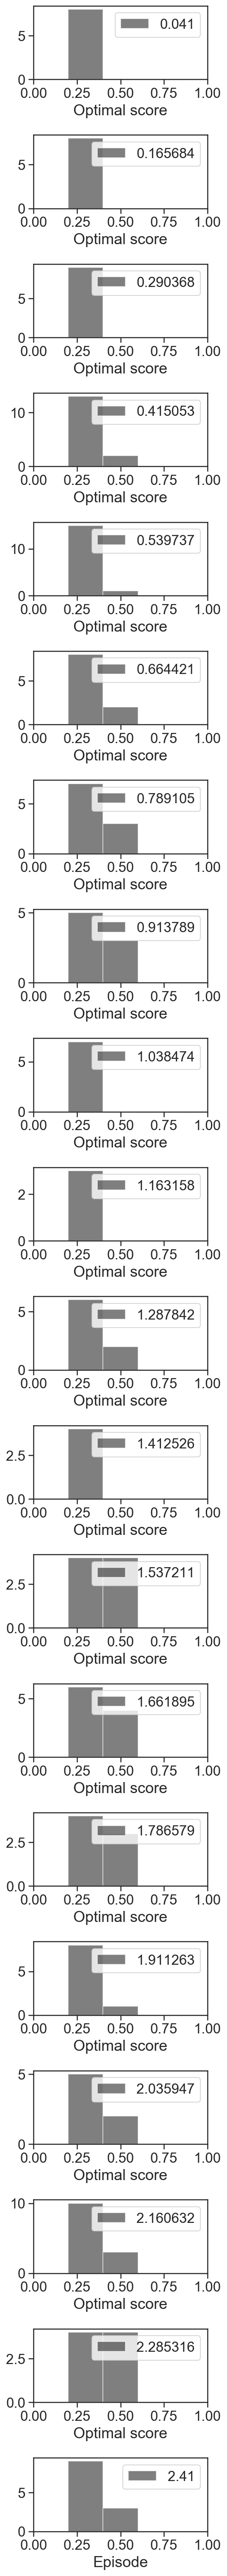

In [12]:
plt.figure(figsize=(4, 42.5))

sims = sorted(set(grid_50['c']))
for n, sim in enumerate(sims):
    plt.subplot(len(sims), 1, n+1)
    index = sim == np.asarray(grid_50['c'])
    index = np.arange(0,len(index))[index]
    first = True
    data = []
    for r, mon in enumerate(exp_50):
        if r in index:
            if mon is not None:
                data.append(np.mean(mon['score']))                
    _ = plt.hist(data, label=sim, alpha=0.5, color="black", bins=5, range=(0,1))        
    _ = plt.xlabel("Optimal score")
    _ = plt.xlim(0,1)
    _ = plt.tight_layout()
    plt.legend()
                                    
_ = plt.xlabel("Episode")

## learning_rate

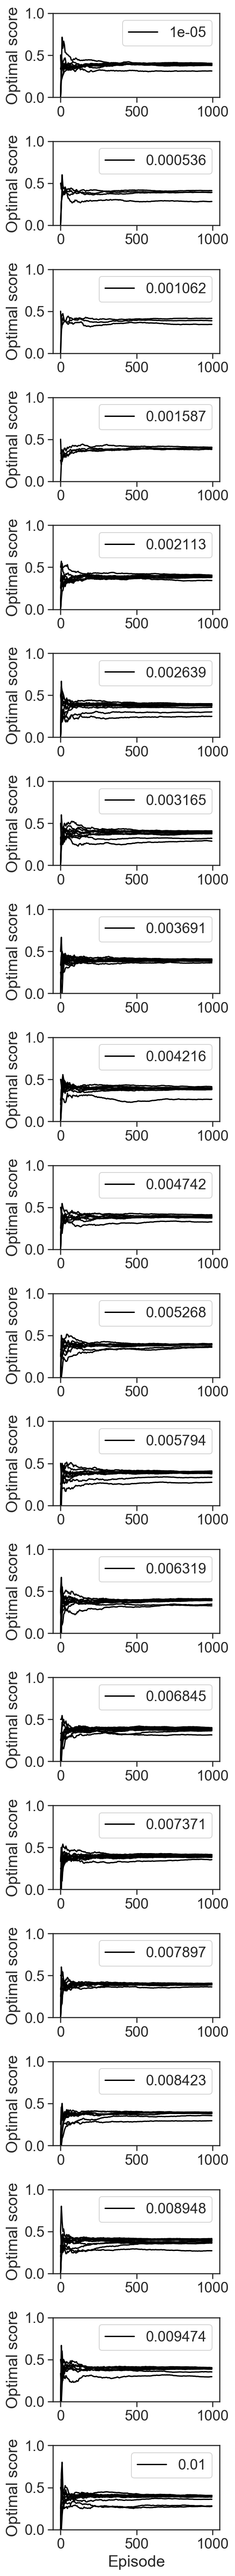

In [14]:
plt.figure(figsize=(4, 40.5))

sims = sorted(set(grid_50['learning_rate']))
for n, sim in enumerate(sims):
    plt.subplot(len(sims), 1, n+1)
    index = sim == np.asarray(grid_50['learning_rate'])
    index = np.arange(0,len(index))[index]
    first = True
    for r, mon in enumerate(exp_50):
        if r in index:
            if mon is not None:
                _ = plt.plot(mon['episode'], mon['score'], label=sim, color='black')
                _ = plt.ylim(0, 1)
                _ = plt.ylabel("Optimal score")
                _ = plt.tight_layout()
                if first:
                    plt.legend()
                    first = False
                                    
_ = plt.xlabel("Episode")

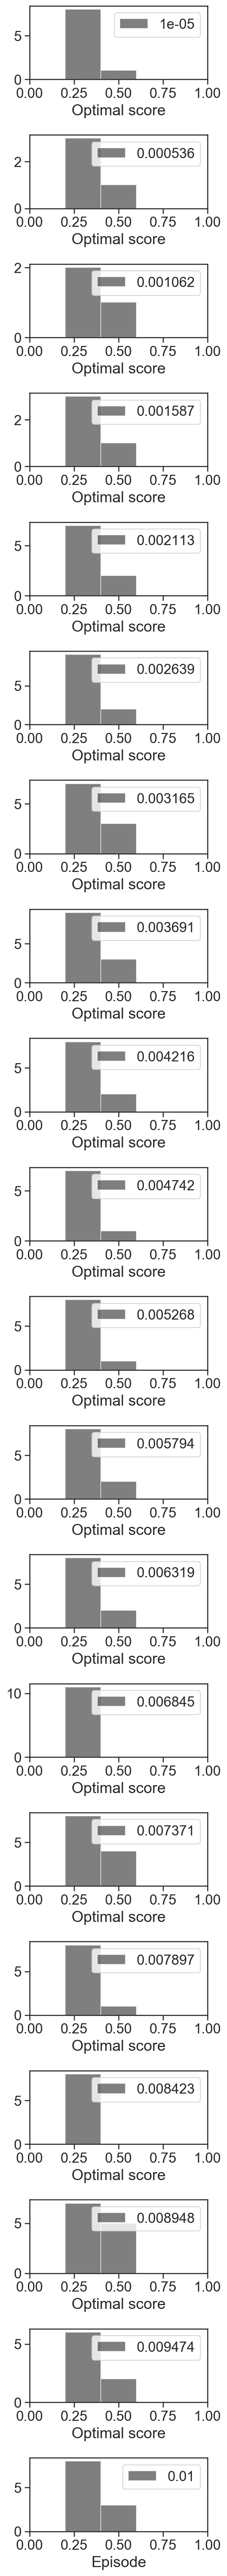

In [16]:
plt.figure(figsize=(4, 42.5))

sims = sorted(set(grid_50['learning_rate']))
for n, sim in enumerate(sims):
    plt.subplot(len(sims), 1, n+1)
    index = sim == np.asarray(grid_50['learning_rate'])
    index = np.arange(0,len(index))[index]
    first = True
    data = []
    for r, mon in enumerate(exp_50):
        if r in index:
            if mon is not None:
                data.append(np.mean(mon['score']))                
    _ = plt.hist(data, label=sim, alpha=0.5, color="black", bins=5, range=(0,1))        
    _ = plt.xlabel("Optimal score")
    _ = plt.xlim(0,1)
    _ = plt.tight_layout()
    plt.legend()
                                    
_ = plt.xlabel("Episode")

# Joint 

Plot ranked max scores DQN for HP sweep: `learning_rate` and `epsilon`.

No handles with labels found to put in legend.


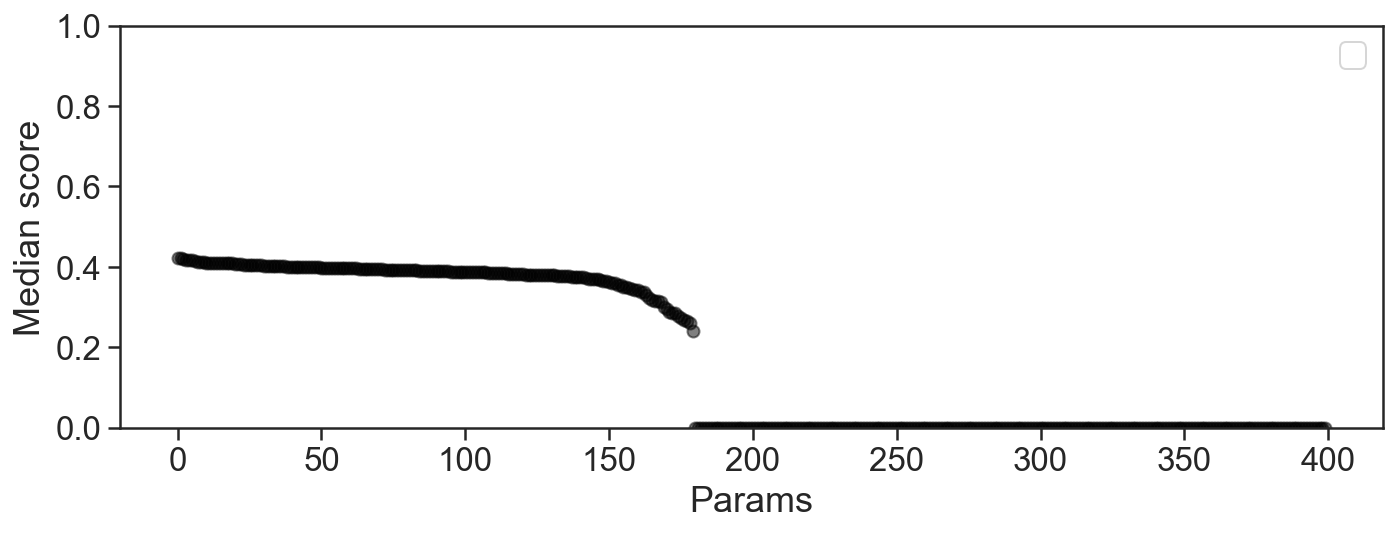

In [20]:
scores = []
for n, exp in enumerate(exp_50):
    if exp is not None:
        x = np.median(exp['score'])
    else:
        x = 0
    scores.append(x)

scores = np.asarray(scores)
ranks = np.argsort(1 - scores).tolist()

plt.figure(figsize=(10, 4))
_ = plt.scatter(range(len(scores)), scores[ranks], alpha=0.5, color="black")        
_ = plt.ylabel("Median score")
_ = plt.xlabel("Params")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()

Top 10:

In [22]:
pprint(("score", "c", "learning_rate"))
pprint([(scores[b], grid_50['c'][b], grid_50['learning_rate'][b]) for b in ranks[:10]])

('score', 'c', 'learning_rate')
[(0.422680412371134, 0.664421, 0.004216),
 (0.42206268672092306, 1.537211, 0.002113),
 (0.4188189812007277, 2.160632, 0.004742),
 (0.4176277710069949, 1.661895, 0.007371),
 (0.4175192260848384, 1.661895, 0.003165),
 (0.41610079628007457, 1.537211, 0.007371),
 (0.41367965904962745, 1.661895, 0.001587),
 (0.4131333093783687, 0.789105, 0.003691),
 (0.41169310564031436, 1.287842, 0.01),
 (0.41092235493633134, 1.537211, 0.000536)]


No handles with labels found to put in legend.


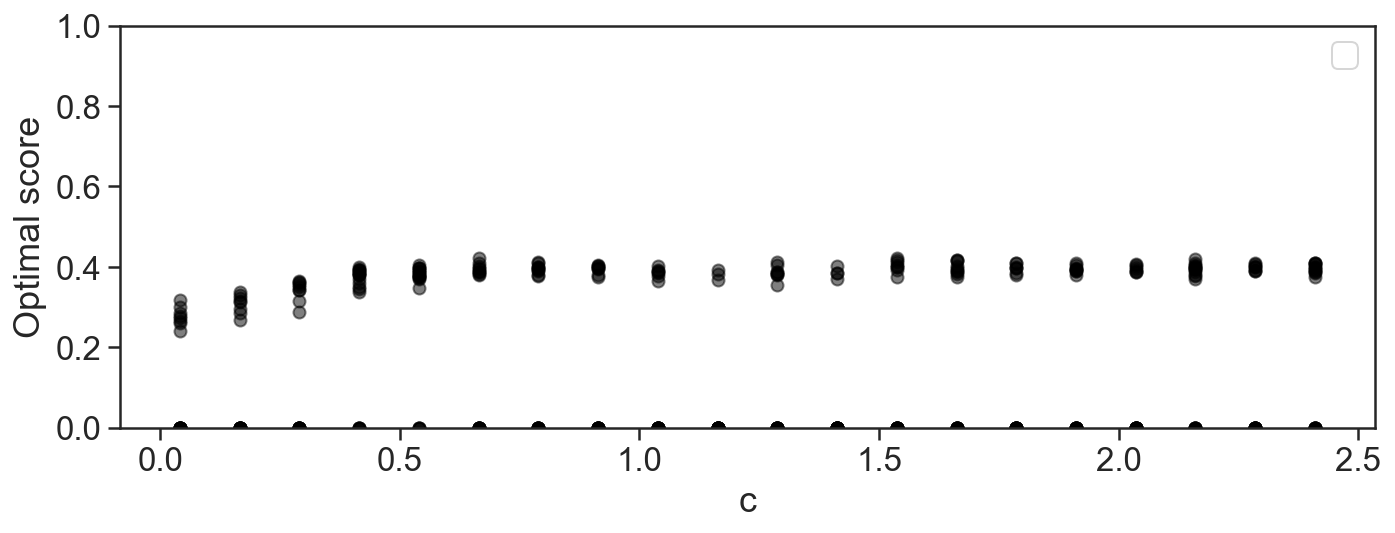

In [23]:
plt.figure(figsize=(10, 4))
_ = plt.scatter(grid_50['c'], scores, alpha=0.5, color="black")        
_ = plt.ylabel("Optimal score")
_ = plt.xlabel("c")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()

No handles with labels found to put in legend.


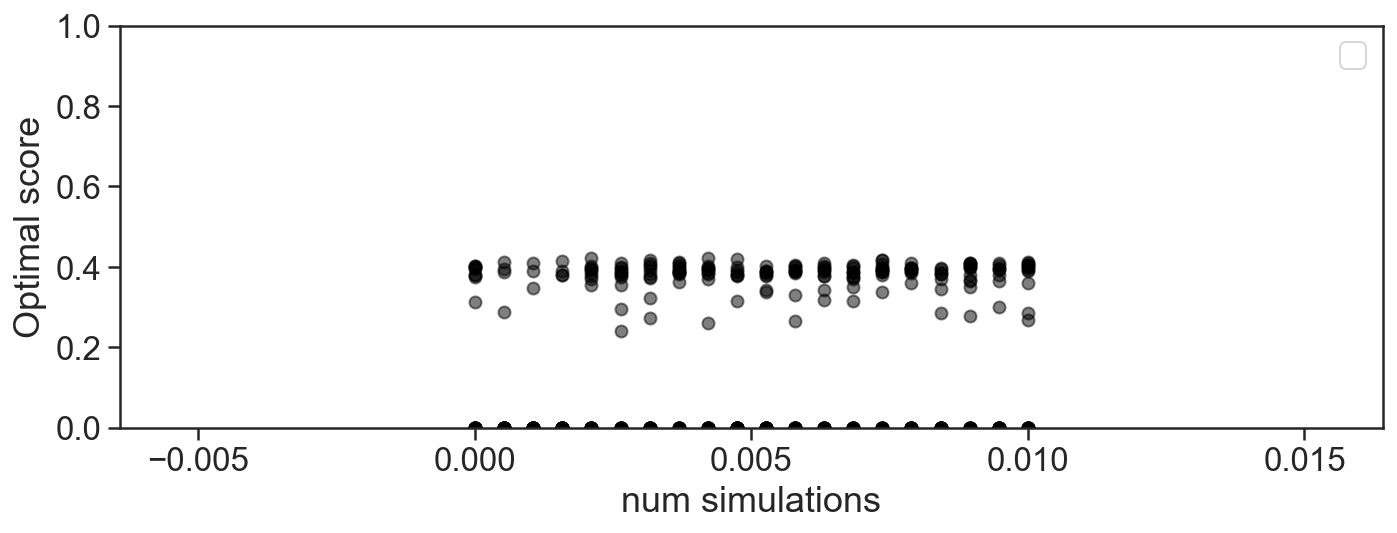

In [25]:
plt.figure(figsize=(10, 4))
_ = plt.scatter(grid_50['learning_rate'], scores, alpha=0.5, color="black")        
_ = plt.ylabel("Optimal score")
_ = plt.xlabel("num simulations")
_ = plt.ylim(0,1)
_ = plt.tight_layout()
plt.legend()